In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

In [3]:
imgs = np.load('cropped_imgs_fetal_regions.npy')
imgs.shape

(180, 224, 224, 3)

In [4]:
with open("manual_annot_CRL_Sagittal.txt", "r") as file:
    # Read the contents of the file
    file_contents = file.read()
lines = file_contents.split('\n')
index = [int(i.split(' ')[0]) for i in lines]
labels = [' '.join(i.split(' ')[1:]) for i in lines]
manual_labels_df = pd.DataFrame()
manual_labels_df['Image ID'] = index
manual_labels_df['label'] = labels

manual_labels_df['label'] = manual_labels_df['label'].apply(lambda x: x.strip())

manual_labels_df = manual_labels_df[manual_labels_df['label'] != 'remove']

num_labels = {'head': 0, 'neck': 1, 'body': 2}

manual_labels_df['encoded_label'] = manual_labels_df['label'].map(num_labels)

y = np.array(manual_labels_df['encoded_label'])

In [5]:
# Function to Extract features from the images
def image_feature(imgs):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    for i in range(imgs.shape[0]):
        x = imgs[i]
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
    return features

In [6]:
feats = image_feature(imgs)

1/1 [==============================] - 0s 34ms/step


In [7]:
feats = np.array(feats)
feats.shape

(180, 51200)

In [8]:
#Creating Clusters
k = 3
clusters = KMeans(k, random_state = 40)
clusters.fit(feats)

c:\Users\SANKARAN\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=40)

In [9]:
clusters_list = clusters.labels_ # To mention which image belong to which cluster

In [10]:
clusters_list

array([2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 2])

In [11]:
y

array([1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2], dtype=int64)

In [12]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Adjusted rand-score: ", adjusted_rand_score(clusters_list, y))

Adjusted rand-score:  0.01980651410175825


In [13]:
# Displaying the features as a t-sne plot
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(feats)

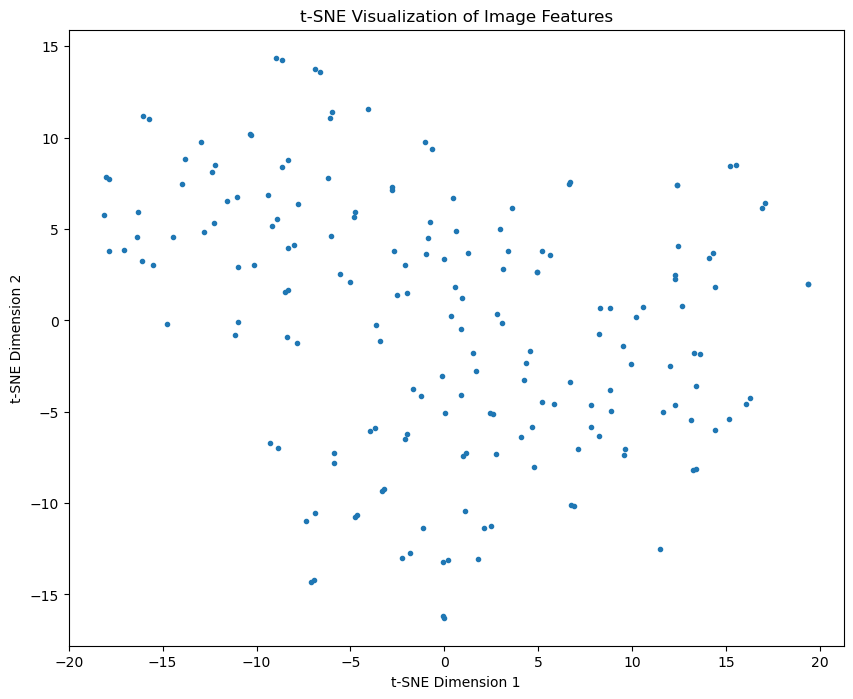

In [14]:
# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], marker='.')
plt.title('t-SNE Visualization of Image Features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()